# **Assignment 1**

In [1]:
#Importing the modules 

import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2
import time

from src.P01_histogram import * 
from src.P02_otsu_binarization import *
from src.P03_adaptive_binarization import *
from src.P04_connected_components import *

#### **Problem 1: Histogram Computation**

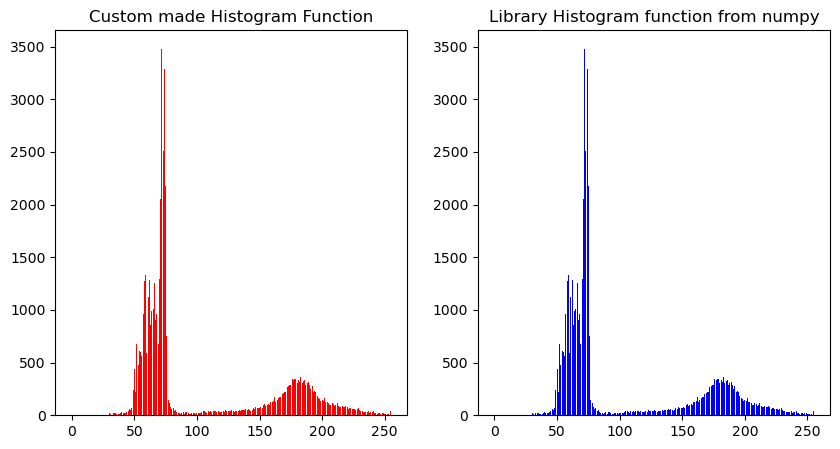

Average Intensity Value from histogram obtained from average: 103.31
Average Intensity Value from numpy: 103.31


In [ ]:
# Histogram of the image and comparison with numpy's histogram function

img = skimage.io.imread('images/coins.png')
    
hist = histogram(img)
hist_lib, _ = np.histogram(img, bins=256, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Custom made Histogram Function')
plt.bar(range(256), hist, color='red')
plt.subplot(1, 2, 2)
plt.title('Library Histogram function from numpy')
plt.bar(range(256), hist_lib, color='blue')
plt.show()


# Average intensity value of the image
avg_inten = meanintensity(img, hist)
print(f"Average Intensity Value from histogram obtained from average: {avg_inten:.2f}")
avg_inten_lib = np.mean(img)
print(f"Average Intensity Value from numpy: {avg_inten_lib:.2f}")

#### **Problem 2: Otsu's Binarization**

##### **Problem 2.a:** Binarization of <span style="font-family: Courier New; font-size: 18px;">Coins.png</span> without offset minimizing within class variance 

Threshold value for Otsu's method without offset: 125


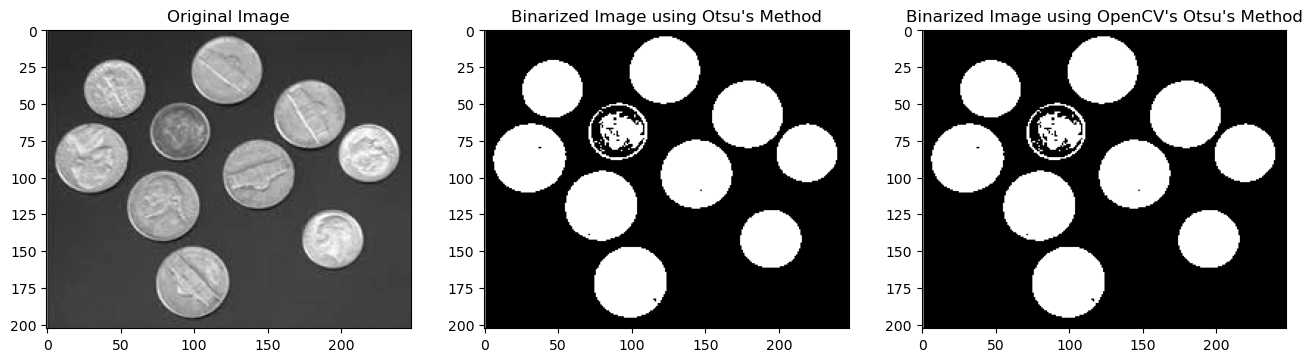

In [ ]:
img = skimage.io.imread('images/coins.png')
cost_within = np.zeros(256)

# start_time = time.time()

for t in np.arange(0, 256):
    cost_within[t] = within_class_variance(img, t)

thresh = np.argmin(cost_within)

# end_time = time.time()
# print(f"Time taken for Otsu's method using within class variance: {end_time - start_time:.4f} seconds")

print(f"Threshold value for Otsu's method without offset: {thresh}")
img_binary = img > thresh


ret, otsu_thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Binarized Image using Otsu\'s Method')
plt.imshow(img_binary, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Binarized Image using OpenCV\'s Otsu\'s Method')
plt.imshow(otsu_thresholded, cmap='gray')
plt.show()


##### **Problem 2.b:** Binarization of <span style="font-family: Courier New; font-size: 18px;">Coins.png</span> with offset maximizing between class variance 

Threshold value for Otsu's method with offset: 145


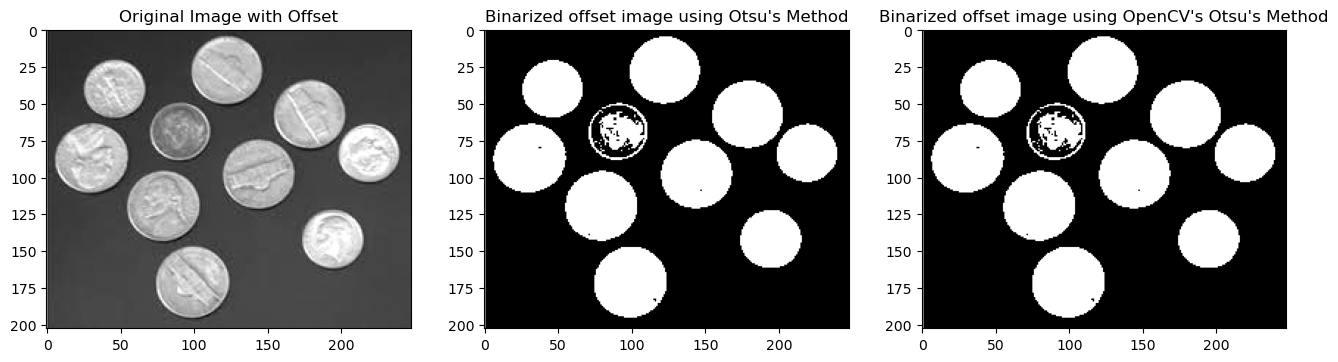

In [ ]:
img = skimage.io.imread('images/coins.png')
img_offset = np.clip(img.astype(np.int16) + 20, 0, 255).astype(np.uint8)

cost_between = np.zeros(256)

# start_time = time.time()

for t in np.arange(0, 256):
    cost_between[t] = between_class_variance(img_offset, t)

thresh = np.argmax(cost_between)

# end_time = time.time()
# print(f"Time taken for Otsu's method with offset using between class variance: {end_time - start_time:.4f} seconds")

print(f"Threshold value for Otsu's method with offset: {thresh}")
img_binary = img_offset > thresh


ret, otsu_thresholded = cv2.threshold(img_offset, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image with Offset')
plt.imshow(img_offset, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Binarized offset image using Otsu\'s Method')
plt.imshow(img_binary, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Binarized offset image using OpenCV\'s Otsu\'s Method')
plt.imshow(otsu_thresholded, cmap='gray')
plt.show()


#### **Problem 3: Adaptive Binarization**

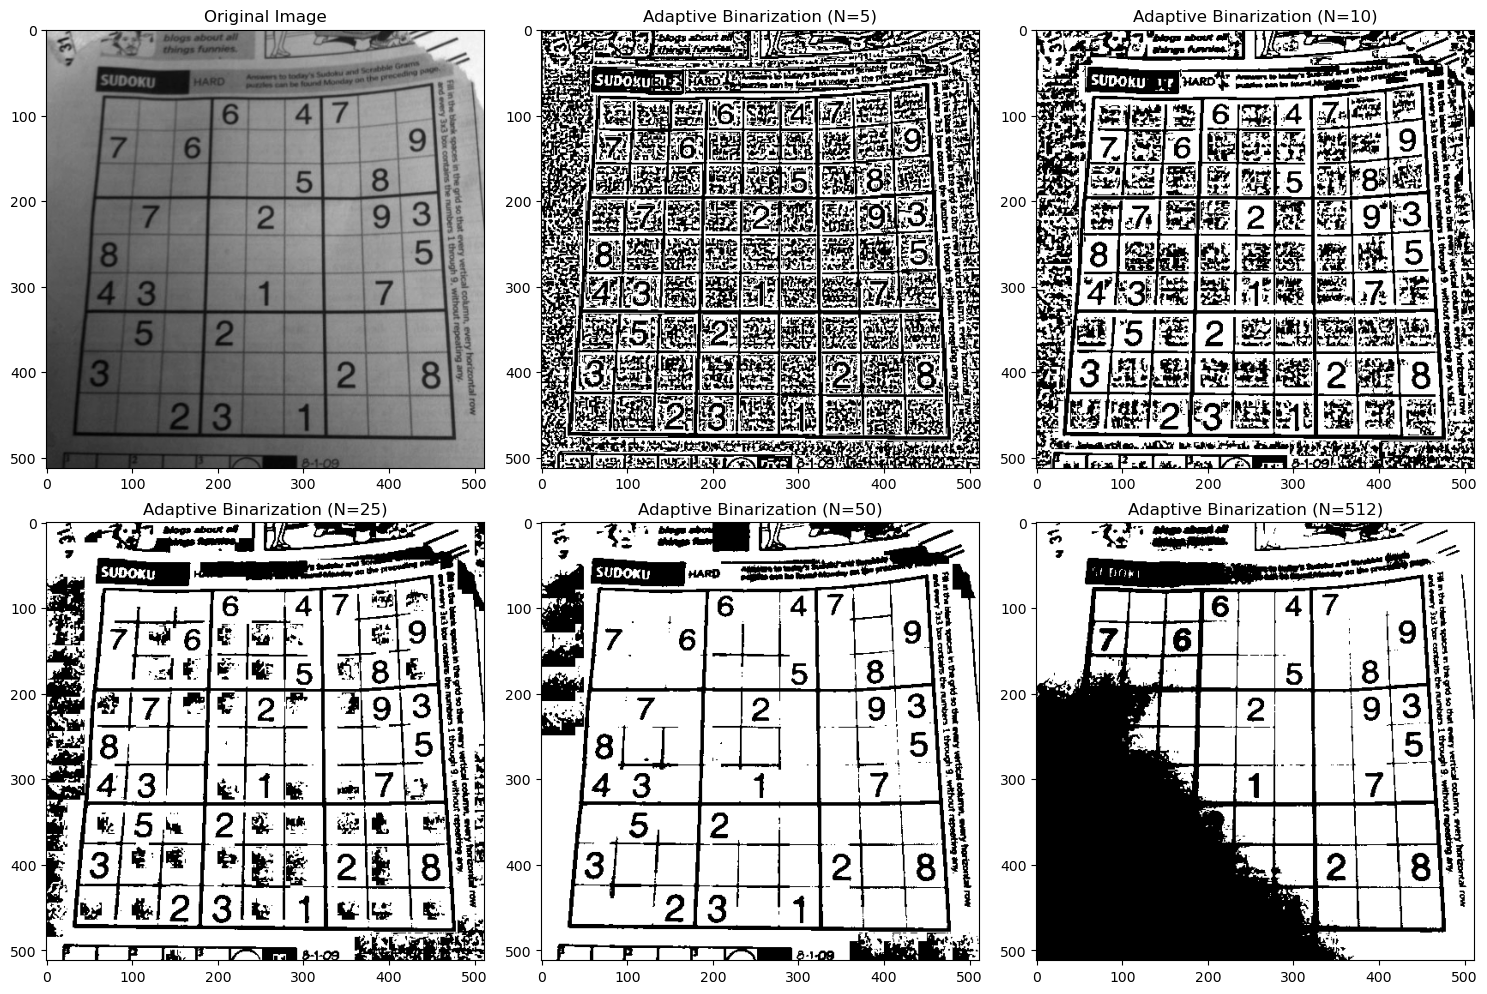

In [2]:
img = skimage.io.imread('images/sudoku.png')
N = 512  # Size of the local window
output_image = np.zeros((img.shape[0], img.shape[1], 5), dtype=np.uint8)

i = 0
window_size = [5,10,25,50,512]
for N in window_size:
    output_image[:,:,i] = adaptive_binarization(img, N)
    i+=1


plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
for j in range(5):
    plt.subplot(2, 3, j+2)
    plt.title(f'Adaptive Binarization (N={window_size[j]})')
    plt.imshow(output_image[:,:,j], cmap='gray')
plt.tight_layout()
plt.show()

#### **Problem 4: Connected Components**

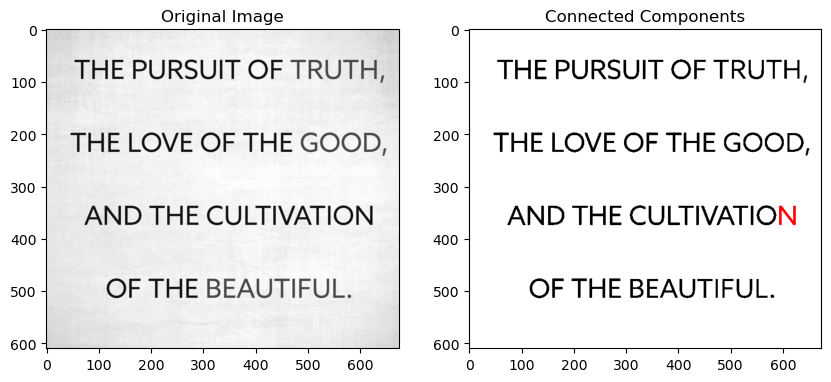

In [ ]:
img = skimage.io.imread('images/quote.png')    

con_comp = connected_components(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Largest Connected Component')
plt.imshow(con_comp, cmap='gray')
plt.show()